In [6]:
#Reki Assiddiqi

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline # Import Pipeline here
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor here
from sklearn.metrics import r2_score, mean_absolute_error


#dataset

In [8]:
df = pd.read_csv('DatasetAudi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


1. model = model mobil
2. year = tahun mobil
3. price = harga mobil
4. transmission = transmisi
5. mileage = jumlah kilometer
6. fuelType = jenis bahan bakar
7. tax = bahan bakar
8. mpg = konsumsi bahan bakar
9. enginesize = ukuran mesin mobil



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [10]:
df.shape

(10668, 9)

In [11]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [12]:
#duplikat
df.duplicated().sum()

np.int64(103)

#preprocesing

In [13]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
engine = engine.rename(columns={'tax':'count'})

In [14]:
X = df.drop(columns=['price'])
y = np.log(df['price'])

In [15]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,Automatic,8646,Petrol,150,47.9,1.4


In [16]:
y

0        9.433484
1        9.711116
2        9.305651
3        9.729134
4        9.758462
           ...   
10663    9.740910
10664    9.740910
10665    9.752607
10666    9.878118
10667    9.680281
Name: price, Length: 10668, dtype: float64

#Visual data(EDA)

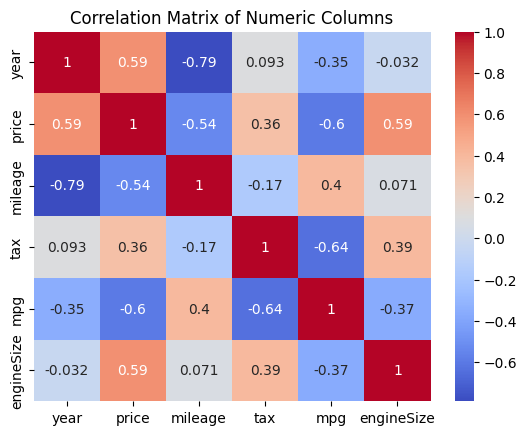

In [17]:
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16156\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

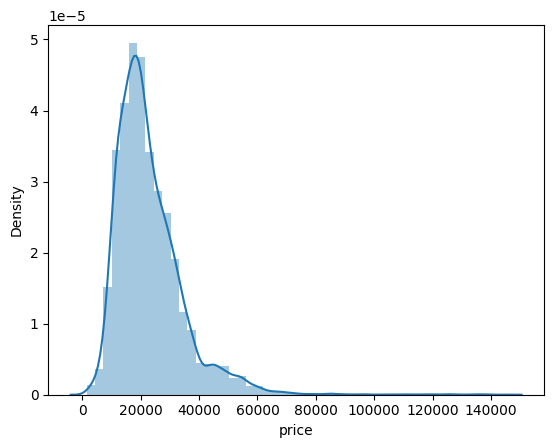

In [18]:
sns.distplot(df['price'])

<Axes: xlabel='model'>

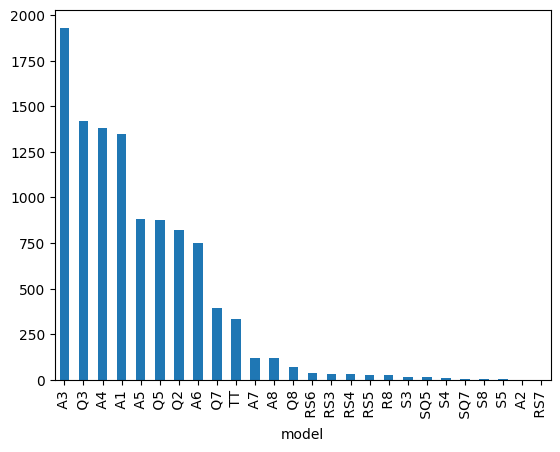

In [19]:
df['model'].value_counts().plot(kind='bar')

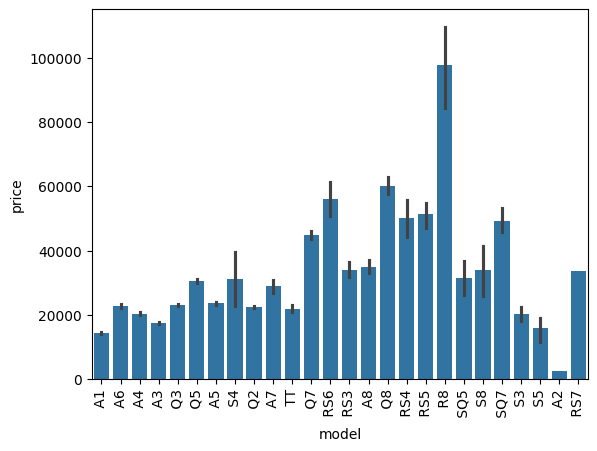

In [20]:
sns.barplot(x=df['model'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='transmission'>

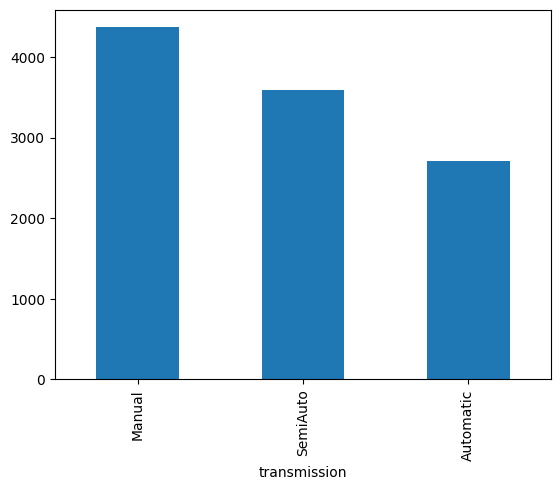

In [21]:
df['transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='fuelType'>

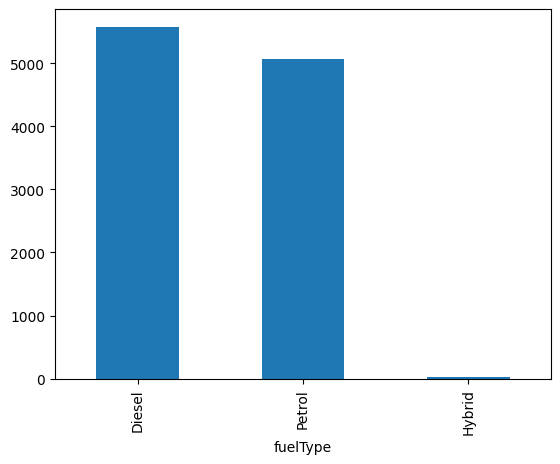

In [22]:
df['fuelType'].value_counts().plot(kind='bar')

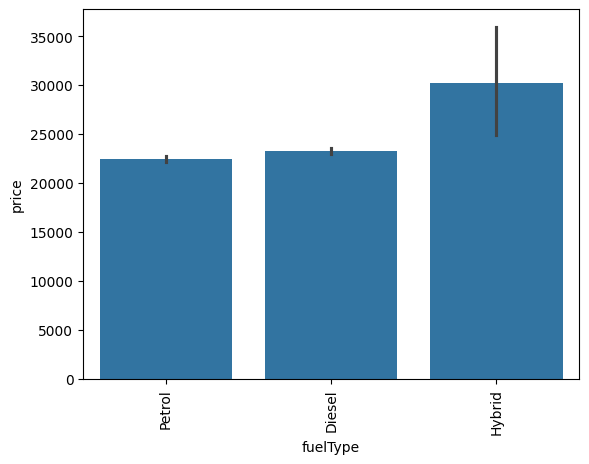

In [23]:
sns.barplot(x=df['fuelType'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='engineSize', ylabel='count'>

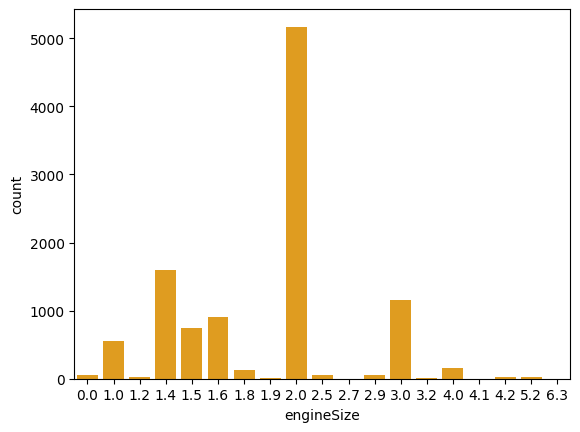

In [24]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
engine = engine.rename(columns={'tax':'count'})
# ...
sns.barplot(x=engine['engineSize'], y=engine['count'], color='orange')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16156\4007947445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

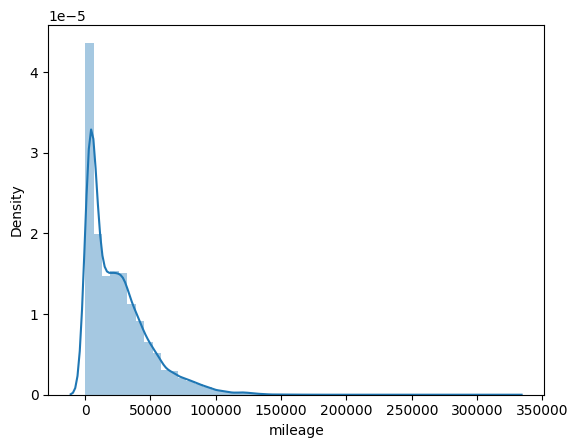

In [25]:
sns.distplot(df['mileage'])

<Axes: xlabel='mpg', ylabel='price'>

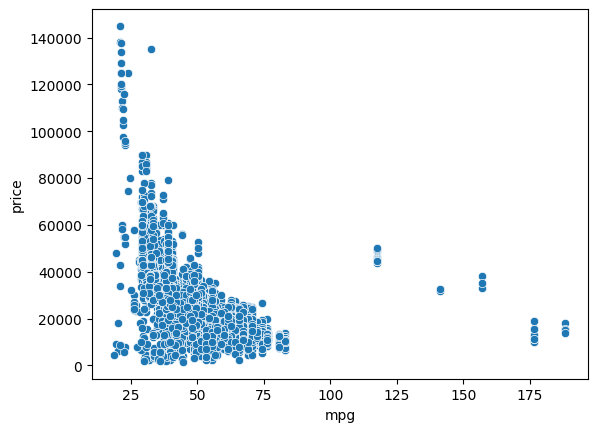

In [26]:
sns.scatterplot(x=df['mpg'], y=df['price'])

<Axes: xlabel='tax', ylabel='price'>

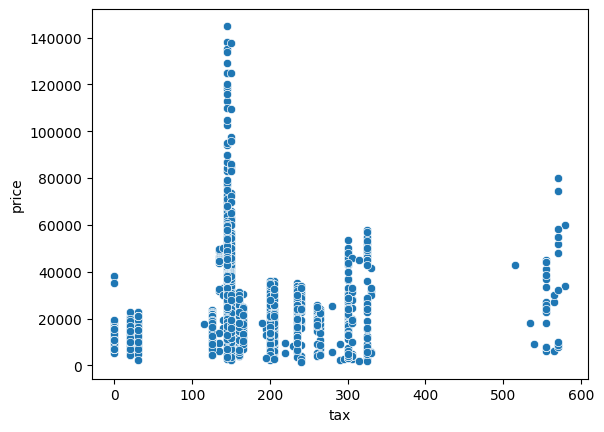

In [27]:
sns.scatterplot(x=df['tax'], y=df['price'])

<Axes: xlabel='year'>

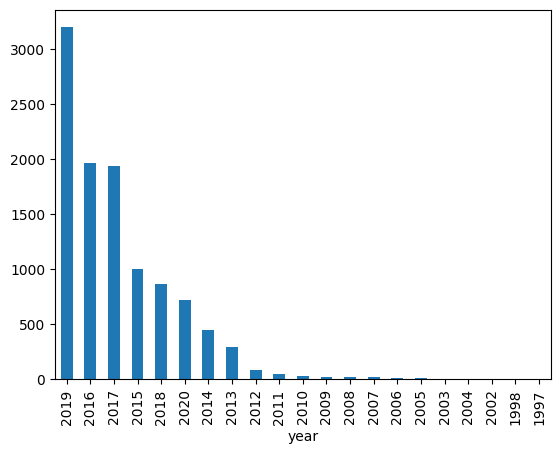

In [28]:
df['year'].value_counts().plot(kind='bar')

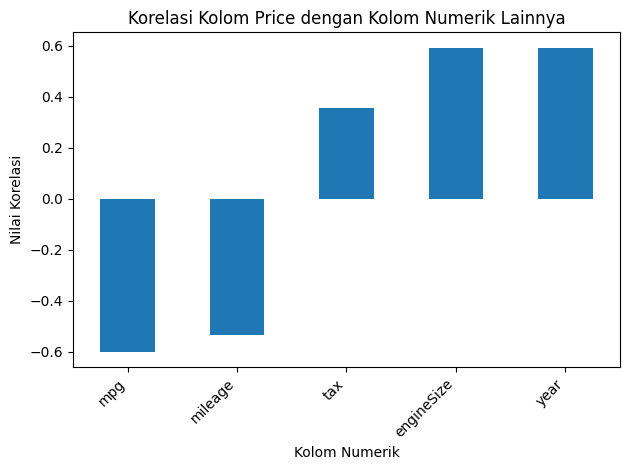

In [29]:
df_numeric = df.select_dtypes(include=np.number)
price_correlation_for_plot = df_numeric.corr()['price'].drop('price')

price_correlation_for_plot.sort_values().plot(kind='bar')
plt.title('Korelasi Kolom Price dengan Kolom Numerik Lainnya')
plt.ylabel('Nilai Korelasi')
plt.xlabel('Kolom Numerik')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# split data

In [30]:
# Split the data *after* feature engineering
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=2)

In [31]:
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
5900,Q5,2019,SemiAuto,5937,Diesel,145,38.2,2.0
2964,A4,2015,SemiAuto,20385,Diesel,125,56.5,2.0
5388,A4,2018,SemiAuto,31850,Petrol,145,36.7,3.0
5649,A4,2017,Automatic,38221,Petrol,145,38.7,3.0
4359,A1,2019,Manual,1308,Petrol,145,47.9,1.0
...,...,...,...,...,...,...,...,...
1099,A3,2019,Manual,4567,Petrol,145,44.8,1.5
2514,A4,2014,Manual,73206,Diesel,125,60.1,2.0
6637,A4,2018,Manual,16217,Petrol,145,51.4,1.4
2575,Q3,2016,Manual,21421,Petrol,145,49.6,1.4


#pelatihan model(training)

In [32]:
# Identify categorical and numerical columns *in the training data*
categorical_features = ['model', 'transmission', 'fuelType']
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = [col for col in categorical_features if col in X_train.columns]
numerical_features = [col for col in numerical_features if col in X_train.columns]

In [33]:
# --- Preprocessing Pipeline ---
# Use OneHotEncoder for categorical features and StandardScaler for numerical features
# Make sure to handle unknown categories in OHE for robustness
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features) # Scale numerical features
    ],
    remainder='passthrough' # Keep other columns (if any)
)

In [34]:
# --- Model Pipeline ---
# Combine preprocessing and the Random Forest Regressor model
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) # Ganti LinearRegression dengan RandomForestRegressor
    # n_estimators: jumlah pohon dalam forest (default 100)
    # random_state: untuk hasil yang reproducible
    # n_jobs=-1: menggunakan semua core CPU untuk mempercepat training
])

In [35]:
# --- Training ---
pipe.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
# --- Prediction ---
y_pred = pipe.predict(X_test)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [37]:
# --- Evaluation ---
print('R2 score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

print('MAE (original scale)', np.exp(mean_absolute_error(y_test, y_pred)))

R2 score 0.96111997982427
MAE 0.06793289085604286
MAE (original scale) 1.0702934795894155


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


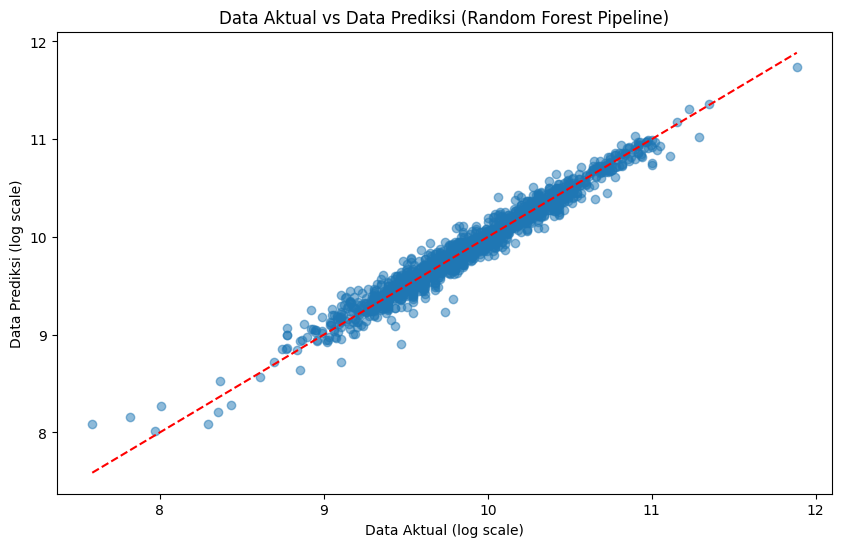

In [38]:
y_pred = pipe.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Data Aktual (log scale)")
plt.ylabel("Data Prediksi (log scale)")
plt.title("Data Aktual vs Data Prediksi (Random Forest Pipeline)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

#Save Model

In [39]:
import pickle

pickle.dump(df,open('df_mobkas.pkl','wb'))
pickle.dump(pipe,open('pipe_mobkas.pkl','wb'))